<a href="https://colab.research.google.com/github/uomodellamansarda/DisneyMoviesAnalysis/blob/main/DisneyRevenuesStreamsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I analyzed the following dataset: 

https://data.world/kgarrett/disney-character-success-00-16

The dataset stores Disney characters, box office success & annual gross income. 

I made a first work evaluating if the dataset was missing relevant information or if between the three source there was any inconsistency . 

After this assessment, after I determinated the level of uncertainty related to the missing information, I identified the top 10 best selling films and the top 10 best selling directors and plotted.

It is very important to highlight that authors of the dataset do not explain how inflation adjusted gross is computed and which value was used.

In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 5)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#the url where the data are located 
url1="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_stream2016_2019.csv"
url2="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_1991-2016.csv"
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
#it's important to highlight that in 2015 and 2019 
#The Walt Disney Company Reports
df1=pd.read_csv(url1)
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
df2=pd.read_csv(url2)

In [3]:
#getting some information to understand 
#what kind of data cleaning work 
#I need to do
print('df1 info')
print(df1.info())
print('df2 info')
print(df2.info())


print('df1 head')
print(df1.head())
print('df2 head')
print(df2.head())


df1 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019        6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes
None
df2 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       25 non-null     float64
 2   Disney Consumer Products[NI 2]   24 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  12 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     floa

From this inspection I noticed that total_gross and inflation_adjusted_gross should be float and not object

In [4]:
#we have to fill the Nan with 0

df1=df1.fillna(0)
df2=df2.fillna(0)
#then we have to transpose the dataframe
df1_t=df1.T
df2_t=df2.T
print(df2_t.head())

print('Df1 Transpose Head')
print(df1_t)
print(df1_t.values[1:])

print('Df2 Transpose Head')
print(df2_t.head())

                                   0     1   ...     24     25
Year                             1991  1992  ...   2015   2016
Studio Entertainment[NI 1]       2593  3115  ...   7366   9441
Disney Consumer Products[NI 2]    724  1081  ...   4499      0
Disney Interactive[NI 3][Rev 1]     0     0  ...   1174      0
Walt Disney Parks and Resorts    2794  3306  ...  16162  16974

[5 rows x 26 columns]
Df1 Transpose Head
                                     0                               1  ...  \
Unnamed: 0  Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...   
2016                              9441                               0  ...   
2017                              8379                               0  ...   
2018                              9987                               0  ...   
2019                             11127                               0  ...   

                      8      9  
Unnamed: 0  Elimination  Total  
2016                  0  55632  
2017  

In [5]:
#we create a new dataframe in order to clean the old one
new_index=df1.columns[1:].astype(int)
print(new_index)
new_columns=df1.iloc[:,0]
print(new_columns)
df_1_restored=pd.DataFrame(data=df1_t.values[1:],index=new_index,columns=new_columns)
df_1_restored = df_1_restored.rename_axis(index='Year',columns='Revenue Stream')
print(df_1_restored)

Int64Index([2016, 2017, 2018, 2019], dtype='int64')
0               Studio Entertainment[NI 1]
1           Disney Consumer Products[NI 2]
2          Disney Interactive[NI 3][Rev 1]
3    Consumer Products & Interactive Media
4            Walt Disney Parks and Resorts
5          Parks, Experiences and Products
6                    Disney Media Networks
7       Direct-to-Consumer & International
8                              Elimination
9                                    Total
Name: Unnamed: 0, dtype: object
Revenue Stream Studio Entertainment[NI 1] Disney Consumer Products[NI 2]  ...  \
Year                                                                      ...   
2016                                 9441                              0  ...   
2017                                 8379                              0  ...   
2018                                 9987                              0  ...   
2019                                11127                              0  ...   


In [6]:
new_columns=df2.iloc[:,1:].columns
new_index=df2.iloc[:-1,0]

new_values=df2.values[:-1,1:]
print("Printing new values")
print(new_values)
print(len(new_values))
print(new_values.shape)
print("New Columns Shape")
print(new_columns.shape)
print("new_index shape")
print(new_index.shape)
df_2_restored=pd.DataFrame(data=new_values,columns=new_columns,index=new_index)
print("Printing Df2 Restored head and info")
print(df_2_restored.tail())
print(df_2_restored.info())

Printing new values
[[2593.0 724.0 0.0 2794.0 0 6111]
 [3115.0 1081.0 0.0 3306.0 0 7502]
 [3673.4 1415.1 0.0 3440.7 0 8529]
 [4793.0 1798.2 0.0 3463.6 '359' 10414]
 [6001.5 2150.0 0.0 3959.8 '414' 12525]
 [0.0 0.0 0.0 4502.0 '4,142' 18739]
 [6981.0 3782.0 174.0 5014.0 '6522' 22473]
 [6849.0 3193.0 260.0 5532.0 '7142' 22976]
 [6548.0 3030.0 206.0 6106.0 '7512' 23402]
 [5994.0 2602.0 368.0 6803.0 '9615' 25402]
 [7004.0 2590.0 0.0 6009.0 '9569' 25790]
 [6465.0 2440.0 0.0 6691.0 '9733' 25360]
 [7364.0 2344.0 0.0 6412.0 '10941' 27061]
 [8713.0 2511.0 0.0 7750.0 '11778' 30752]
 [7587.0 2127.0 0.0 9023.0 '13207' 31944]
 [7529.0 2193.0 0.0 9925.0 '14368' 34285]
 [7491.0 2347.0 0.0 10626.0 '15046' 35510]
 [7348.0 2415.0 719.0 11504.0 '15857' 37843]
 [6136.0 2425.0 712.0 10667.0 '16209' 36149]
 [6701.0 2678.0 761.0 10761.0 '17162' 38063]
 [6351.0 3049.0 982.0 11797.0 '18714' 40893]
 [5825.0 3252.0 845.0 12920.0 '19436' 42278]
 [5979.0 3555.0 1064.0 14087.0 '20356' 45041]
 [7278.0 3985.0 1299.0 1

In [7]:
df_2_restored=df_2_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
print(df_2_restored.head())
print(df_2_restored.tail())
print(df_2_restored.info())
print("We want to understand why Disney Media Networks is not a number and then change with 0")
print("Filtering the object")
df2_filter=df_2_restored[df_2_restored["Disney Media Networks"].isnull()]
print(df2_filter)
df_2_restored=df_2_restored.fillna(0)
print("Df2 Restored Info")
print(df_2_restored.info())
#we do the same with df_1_restored
df_1_restored=df_1_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
df_1_restored=df_1_restored.fillna(0)
#understanding df_1_restored and df_2_restored index datatype
print(type(df_1_restored.index))
print(df_1_restored.index.dtype)
print(type(df_2_restored.index))
print(df_2_restored.index.dtype)

      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
1991                      2593.0                           724.0  ...   
1992                      3115.0                          1081.0  ...   
1993                      3673.4                          1415.1  ...   
1994                      4793.0                          1798.2  ...   
1995                      6001.5                          2150.0  ...   

      Disney Media Networks  Total  
Year                                
1991                    0.0   6111  
1992                    0.0   7502  
1993                    0.0   8529  
1994                  359.0  10414  
1995                  414.0  12525  

[5 rows x 6 columns]
      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
2011                      6351.0                          304

In [8]:
df_merge=df_1_restored.merge(df_2_restored, how='outer',right_index=True,left_index=True)
print(df_merge.info())
print(df_merge.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1991 to 2019
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Studio Entertainment[NI 1]_x           4 non-null      float64
 1   Disney Consumer Products[NI 2]_x       4 non-null      float64
 2   Disney Interactive[NI 3][Rev 1]_x      4 non-null      float64
 3   Consumer Products & Interactive Media  4 non-null      float64
 4   Walt Disney Parks and Resorts_x        4 non-null      float64
 5   Parks, Experiences and Products        4 non-null      float64
 6   Disney Media Networks_x                4 non-null      float64
 7   Direct-to-Consumer & International     4 non-null      float64
 8   Elimination                            4 non-null      float64
 9   Total_x                                4 non-null      float64
 10  Studio Entertainment[NI 1]_y           25 non-null     float64
 11  Dis

In [9]:
#second attemp on merging
df_merge_2=pd.concat([df_1_restored,df_2_restored])


In [10]:
print(df_merge_2.tail(12))
print(df_merge_2.info())


      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
2004                      8713.0                          2511.0  ...   
2005                      7587.0                          2127.0  ...   
2006                      7529.0                          2193.0  ...   
2007                      7491.0                          2347.0  ...   
2008                      7348.0                          2415.0  ...   
2009                      6136.0                          2425.0  ...   
2010                      6701.0                          2678.0  ...   
2011                      6351.0                          3049.0  ...   
2012                      5825.0                          3252.0  ...   
2013                      5979.0                          3555.0  ...   
2014                      7278.0                          3985.0  ...   
2015                      7366.0                   

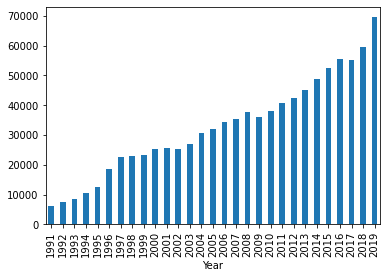

In [11]:
df_merge_2['Total'].sort_index().plot(kind='bar')

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]


<BarContainer object of 29 artists>

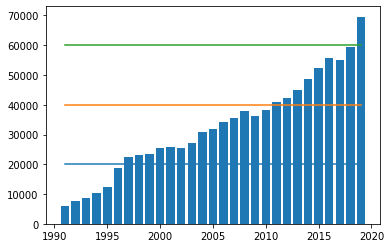

In [12]:
x1=20000
x2=40000
x3=60000
y_range=np.arange(1991,2020)
y1=np.full(len(y_range),x1)
y2=np.full(len(y_range),x2)
y3=np.full(len(y_range),x3)
print(y_range)
fig,ax=plt.subplots()
ax.plot(y_range,y1)
ax.plot(y_range,y2)
ax.plot(y_range,y3)
ax.bar(y_range,df_merge_2['Total'].sort_index())

In [13]:
print(df_merge_2.columns)

Index(['Studio Entertainment[NI 1]', 'Disney Consumer Products[NI 2]',
       'Disney Interactive[NI 3][Rev 1]',
       'Consumer Products & Interactive Media',
       'Walt Disney Parks and Resorts', 'Parks, Experiences and Products',
       'Disney Media Networks', 'Direct-to-Consumer & International',
       'Elimination', 'Total'],
      dtype='object')


In [25]:
df_merge_2=df_merge_2.fillna(0)
studio_entert=pd.DataFrame(df_merge_2['Studio Entertainment[NI 1]']).sort_index()
park_sum=df_merge_2['Walt Disney Parks and Resorts']+df_merge_2['Parks, Experiences and Products']
park_resort=pd.DataFrame(park_sum,columns=['park_resort']).sort_index()

disney_media_network=pd.DataFrame(df_merge_2['Disney Media Networks']).sort_index()

studio_entert['Total']=df_merge_2['Total']
park_resort['Total']=df_merge_2['Total']
disney_media_network['Total']=df_merge_2['Total']

studio_entert['studio_p']=round(studio_entert['Studio Entertainment[NI 1]']/studio_entert['Total']*100,2)
studio_entert['complementary']=100-studio_entert['studio_p']
park_resort['park_p']=round(park_resort.iloc[:,0]/park_resort['Total']*100,2)
park_resort['complementary']=100-park_resort['park_p']

disney_media_network['media_p']=round(disney_media_network.iloc[:,0]/disney_media_network['Total']*100,2)
disney_media_network['complementary']=100-disney_media_network['media_p']
print(studio_entert.tail())
print(park_resort.tail())
print(park_resort.head())
print(disney_media_network.head())
print(disney_media_network.tail())
#disney_media_network=park_resort.assign(df_merge_2['Total'])

      Studio Entertainment[NI 1]    Total  studio_p  complementary
Year                                                              
2015                      7366.0  52465.0     14.04          85.96
2016                      9441.0  55632.0     16.97          83.03
2017                      8379.0  55137.0     15.20          84.80
2018                      9987.0  59434.0     16.80          83.20
2019                     11127.0  69570.0     15.99          84.01
      park_resort    Total  park_p  complementary
Year                                             
2015      16162.0  52465.0   30.81          69.19
2016      16974.0  55632.0   30.51          69.49
2017      18415.0  55137.0   33.40          66.60
2018      20296.0  59434.0   34.15          65.85
2019      26225.0  69570.0   37.70          62.30
      park_resort    Total  park_p  complementary
Year                                             
1991       2794.0   6111.0   45.72          54.28
1992       3306.0   7502.0   44